In [12]:
b1 <- -13.89 / 22.67
b0 <- 5.89 - b1 * 7.5
c(b0, b1)

[1] 10.485280 -0.612704

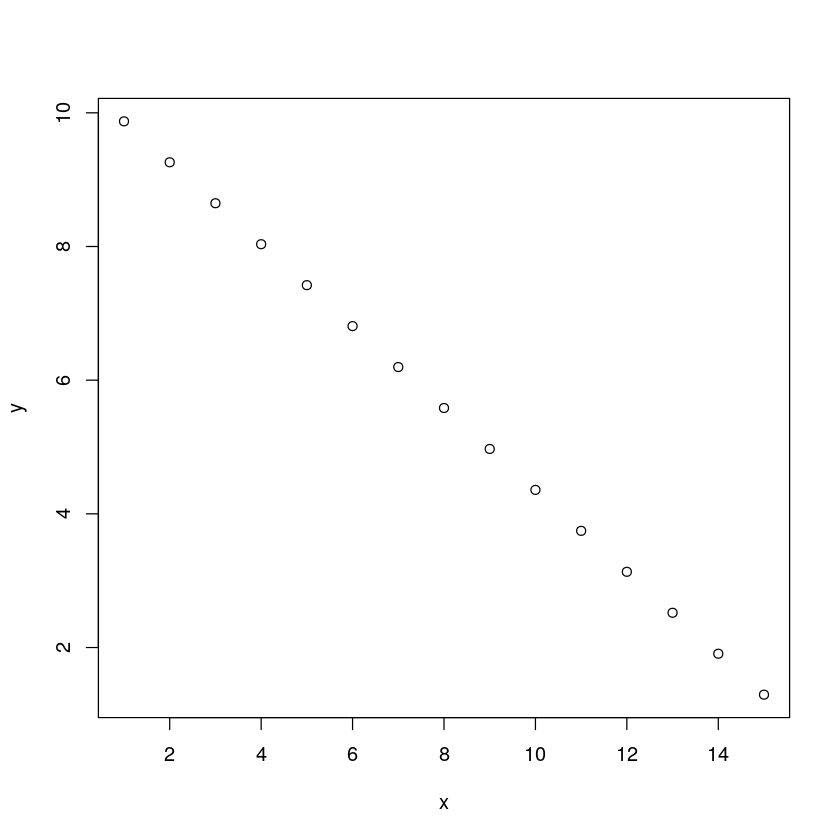

In [13]:
x <- seq(from=1, to=15, by = 1)
y = (x * b1) + b0
plot(y ~ x)

In [26]:
sse.a = 71.32
sse.c = 13.27 * (16 - 1)
pre = (sse.c - sse.a) / sse.c
pre
f = (pre / ((1 - pre) / 14))
f

[1] 0.6416981

[1] 25.07319

In [27]:
diff <- sqrt(4.60 * (71.32 / 14) / (15 * 22.67))
c(b1-diff,b1+diff)

[1] -0.875216 -0.350192

In [30]:
correlation <- -13.89 / sqrt(22.67 * 13.27)
correlation ** 2

[1] 0.6413307

In [33]:
library(foreign)
d <- as.data.frame(read.spss("./2017_Questionnaire_1_cleaned.sav"))
summary(d)

Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: File-indicated value is different from internal value for at least one of the three system values.  SYSMIS: indicated -1.79769e+308, expected -1.79769e+308; HIGHEST: 1.79769e+308, 1.79769e+308; LOWEST: -1.79769e+308, -1.79769e+308”Warning message in read.spss("./2017_Questionnaire_1_cleaned.sav"):
“./2017_Questionnaire_1_cleaned.sav: Unrecognized record type 7, subtype 18 encountered in system file”

  Response_ID         Height          Weight           Age           Gender   
 Min.   :519833   Min.   :150.0   Min.   :40.00   Min.   :18.00   Female:128  
 1st Qu.:520436   1st Qu.:164.0   1st Qu.:55.00   1st Qu.:22.00   Male  : 62  
 Median :521902   Median :170.0   Median :61.00   Median :23.00               
 Mean   :522593   Mean   :170.1   Mean   :63.57   Mean   :25.15               
 3rd Qu.:524043   3rd Qu.:177.0   3rd Qu.:71.75   3rd Qu.:26.00               
 Max.   :528705   Max.   :196.0   Max.   :99.00   Max.   :49.00               
                                                  NA's   :1                   
    Self_esteem  Lecturer_age   Lecturer_height TelephoneDigit 
 High     :69   Min.   :28.00   Min.   :168.0   Min.   :0.000  
 Low      :22   1st Qu.:34.00   1st Qu.:180.0   1st Qu.:3.000  
 Moderate :87   Median :35.00   Median :185.0   Median :5.000  
 Very high: 8   Mean   :36.42   Mean   :185.7   Mean   :4.914  
 Very Low : 4   3rd Qu.:38.00   3rd Qu.:190.0   

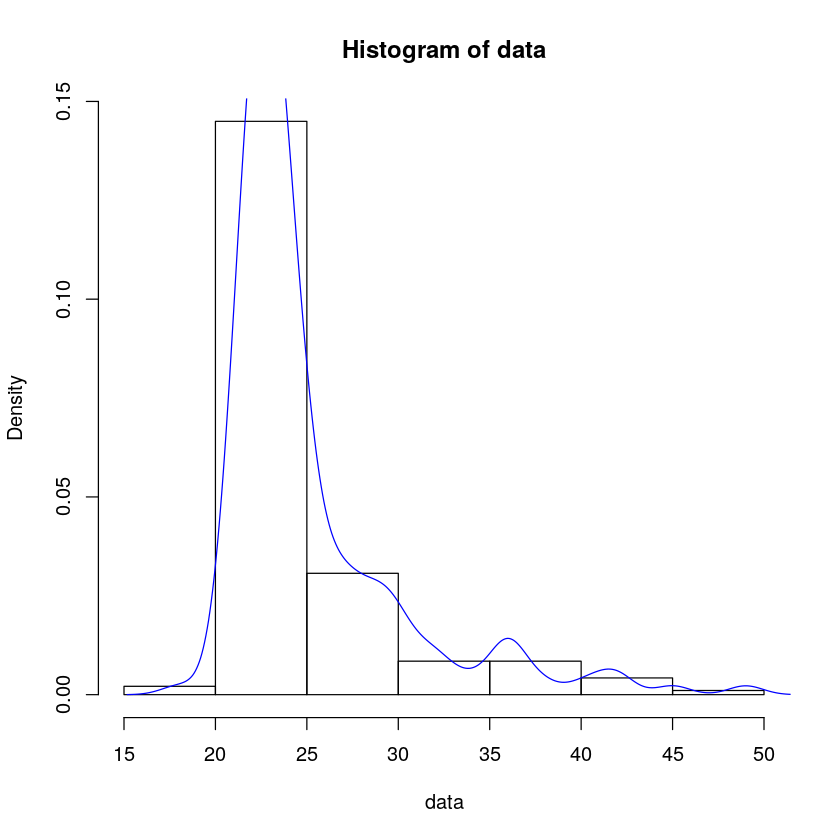

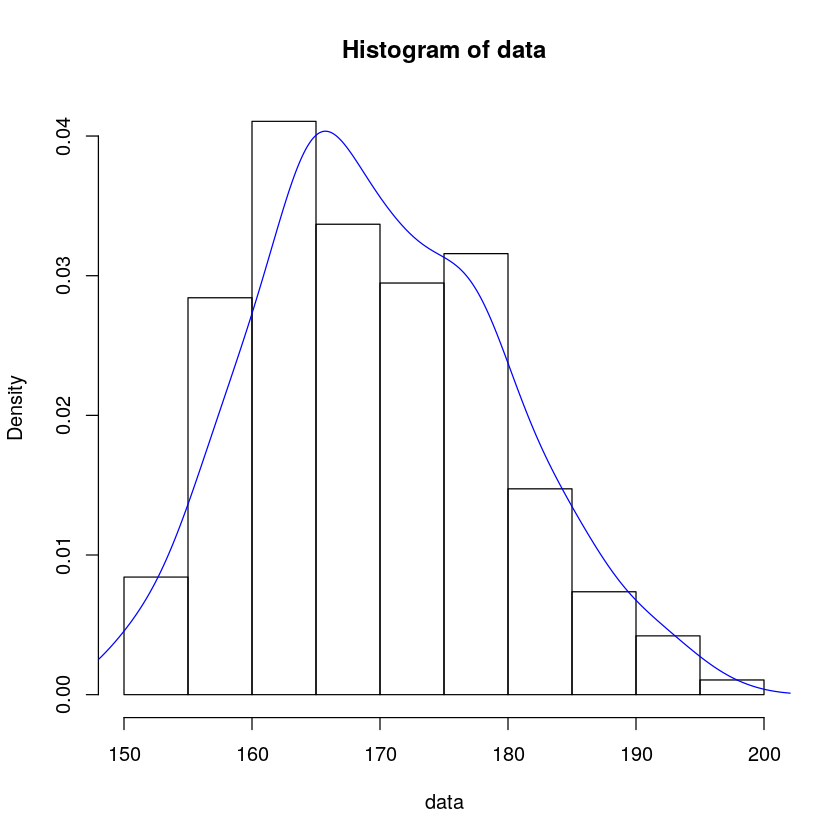

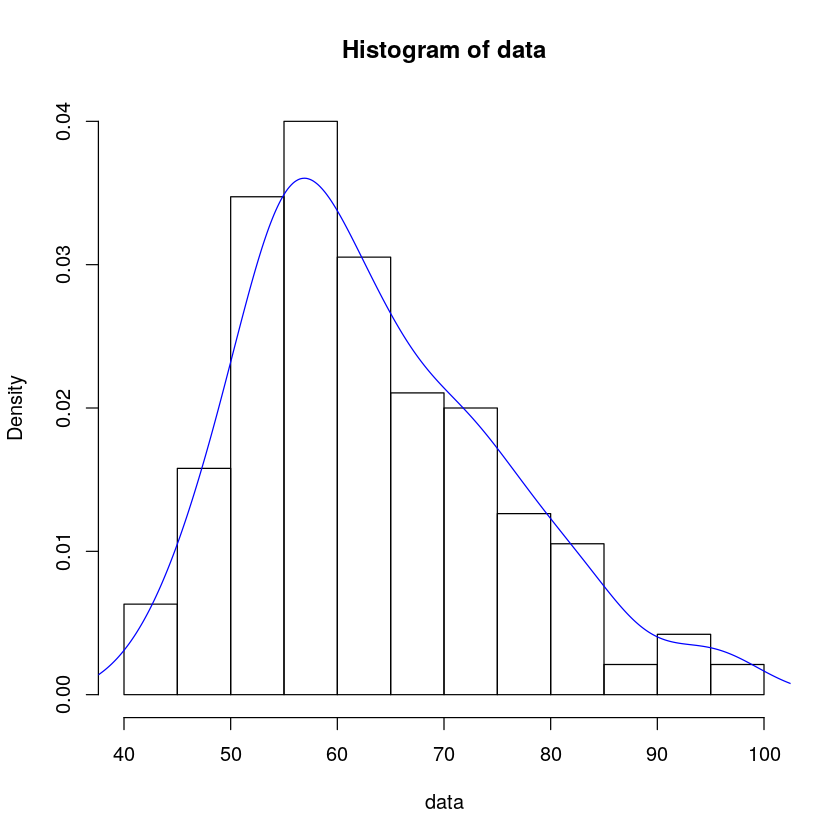

In [47]:
dhist <- function(data) {
hist(data, prob=TRUE)
lines(density(data, na.rm=TRUE), col="blue")
}
dhist(d$Age)
dhist(d$Height)
dhist(d$Weight)

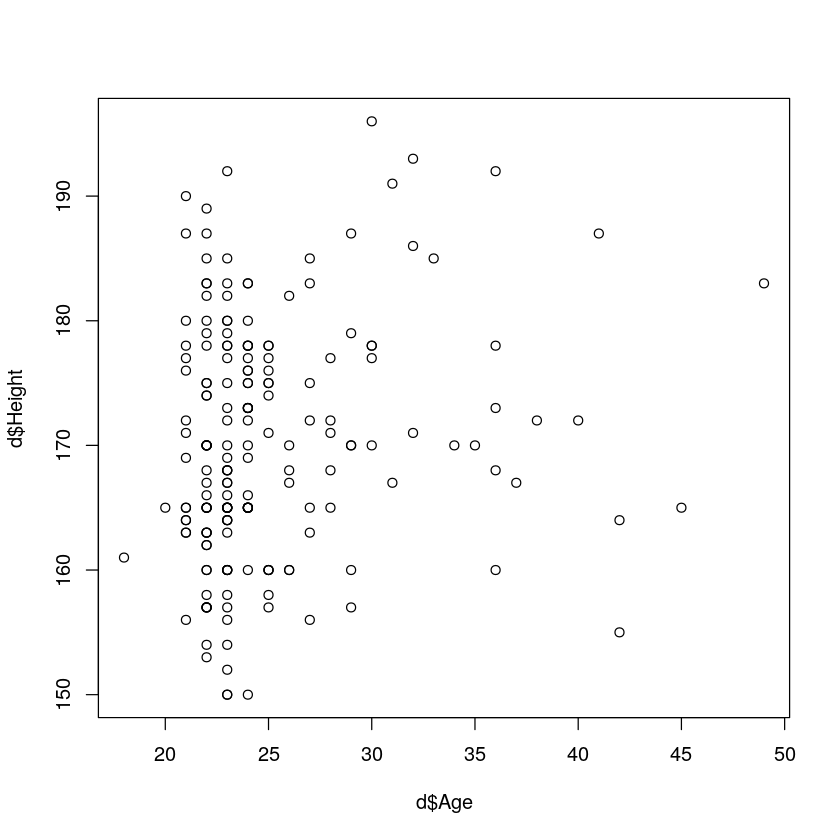

In [49]:
plot(d$Height ~ d$Age)


Call:
lm(formula = Weight ~ Height, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.541  -6.225  -1.249   4.208  32.948 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -91.83747   10.77952   -8.52  5.1e-15 ***
Height        0.91343    0.06326   14.44  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.305 on 188 degrees of freedom
Multiple R-squared:  0.5259,	Adjusted R-squared:  0.5233 
F-statistic: 208.5 on 1 and 188 DF,  p-value: < 2.2e-16


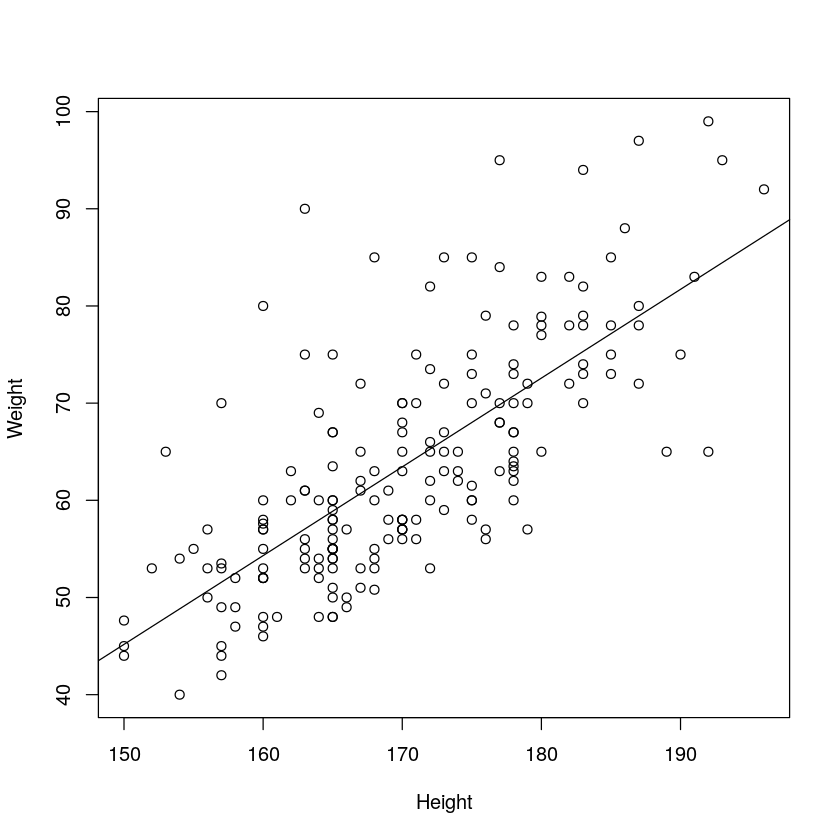

In [57]:
plot(Weight ~ Height, data=d)
model <- lm(Weight ~ Height, data=d)
summary(model)
abline(model)


Call:
lm(formula = Weight ~ Age, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.577  -8.577  -1.577   8.423  31.584 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.0906     4.4177  10.886  < 2e-16 ***
Age           0.6130     0.1724   3.557 0.000476 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.68 on 187 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.06336,	Adjusted R-squared:  0.05835 
F-statistic: 12.65 on 1 and 187 DF,  p-value: 0.0004758


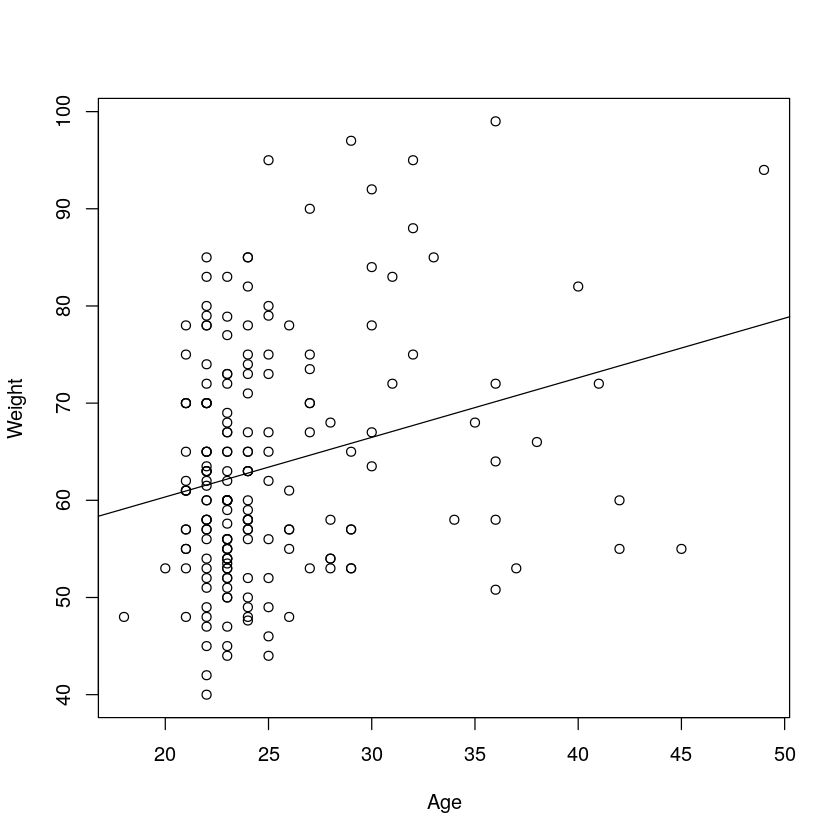

In [59]:
plot(Weight ~ Age, data=d)
model <- lm(Weight ~ Age, data=d)
summary(model)
abline(model)

In [62]:
model <- lm(Weight ~ Height + Age, data=d)
summary(model)


Call:
lm(formula = Weight ~ Height + Age, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.296  -5.715  -0.865   4.533  32.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -96.66691   10.59289  -9.126  < 2e-16 ***
Height        0.89295    0.06256  14.274  < 2e-16 ***
Age           0.32677    0.12106   2.699  0.00759 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.087 on 186 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.553,	Adjusted R-squared:  0.5482 
F-statistic: 115.1 on 2 and 186 DF,  p-value: < 2.2e-16


In [1]:
plot(Weight ~ Age, data=d)
model <- lm(Weight ~ Age, data=d)
weight.age <- residuals(model)
rmodel <- lm(weight.age ~ d$)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:29: unexpected ')'
3: weight.age <- residuals(model)
4: rmodel <- lm(weight.age ~ d$)
                               ^


     sawbs           wtpercep        shpercep          hiq        
 Min.   :-47.74   Min.   :1.544   Min.   :1.816   Min.   :-1.981  
 1st Qu.: 30.14   1st Qu.:2.815   1st Qu.:3.469   1st Qu.: 9.829  
 Median : 57.63   Median :3.172   Median :4.196   Median :17.203  
 Mean   : 57.60   Mean   :3.200   Mean   :4.200   Mean   :16.800  
 3rd Qu.: 88.58   3rd Qu.:3.595   3rd Qu.:4.862   3rd Qu.:21.920  
 Max.   :159.66   Max.   :4.688   Max.   :7.084   Max.   :36.246  
    edicomp            rses            bdi              bmi       
 Min.   :-12.67   Min.   :11.20   Min.   :-6.640   Min.   :13.88  
 1st Qu.: 12.75   1st Qu.:30.93   1st Qu.: 6.119   1st Qu.:19.17  
 Median : 23.38   Median :36.62   Median :10.077   Median :21.85  
 Mean   : 22.50   Mean   :36.00   Mean   :10.500   Mean   :21.70  
 3rd Qu.: 33.68   3rd Qu.:40.82   3rd Qu.:15.186   3rd Qu.:24.20  
 Max.   : 67.71   Max.   :54.97   Max.   :32.366   Max.   :28.13  
      ses             socdesir     
 Min.   :-0.7962   Min.   

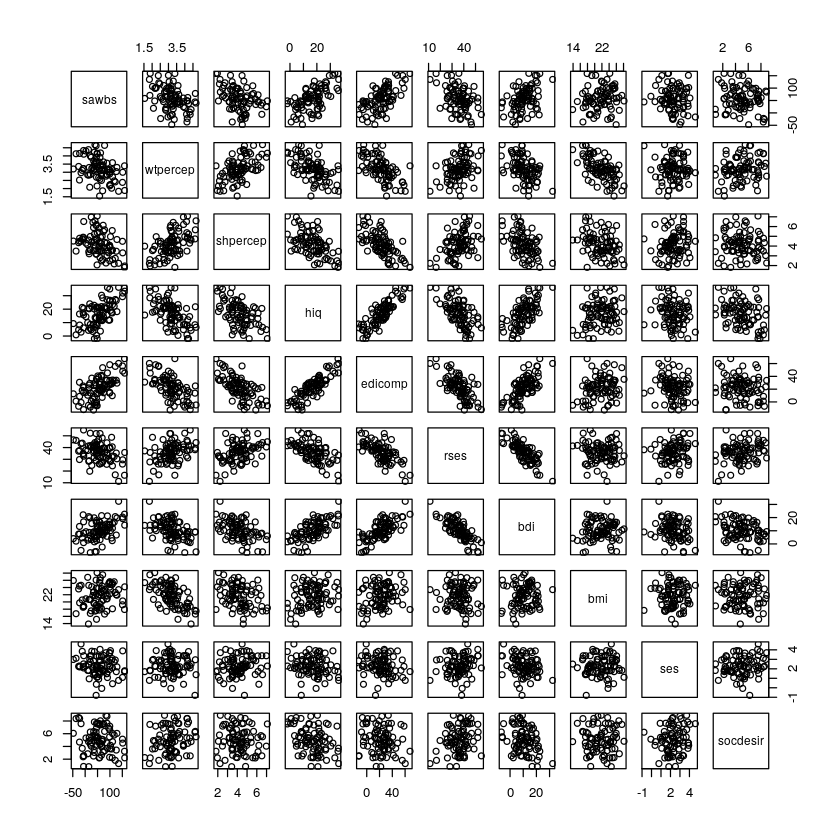

In [4]:
library(foreign)
d <- as.data.frame(read.spss("./Geller.sav"))
summary(d)
pairs(d)

In [13]:
model.c = lm(edicomp ~ 0, data=d)
summary(model.c)

model.a = lm(edicomp ~ rses + bdi + bmi, data=d)
summary(model.a)

pre <- function (actual, estimate.c, estimate.a) {
    sse.c <- sum((estimate.c - actual) ** 2)
    sse.a <- sum((estimate.a - actual) ** 2)
    (sse.c - sse.a) / sse.c
}

pre(d$edicomp, predict.lm(model.c), predict.lm(model.a))


Call:
lm(formula = edicomp ~ 0, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-12.67  12.75  23.38  33.68  67.72 

No Coefficients

Residual standard error: 28.44 on 84 degrees of freedom



Call:
lm(formula = edicomp ~ rses + bdi + bmi, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-31.4775  -7.5257  -0.3898   5.5416  25.8363 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.5664    14.6948   0.923 0.358674    
rses         -0.6801     0.2563  -2.654 0.009596 ** 
bdi           1.0759     0.2924   3.680 0.000422 ***
bmi           1.0194     0.4131   2.467 0.015741 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.62 on 80 degrees of freedom
Multiple R-squared:  0.5747,	Adjusted R-squared:  0.5588 
F-statistic: 36.04 on 3 and 80 DF,  p-value: 7.716e-15


[1] 0.8409034

In [17]:
model.a1 = lm(edicomp ~ rses + bdi + bmi + sawbs, data=d)
summary(model.a1)

pre(d$edicomp, predict.lm(model.a), predict.lm(model.a1))


Call:
lm(formula = edicomp ~ rses + bdi + bmi + sawbs, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.9073  -6.1283  -0.6431   6.4555  21.6653 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.38826   13.02097   0.875   0.3844    
rses        -0.59457    0.22763  -2.612   0.0108 *  
bdi          0.80572    0.26498   3.041   0.0032 ** 
bmi          0.76236    0.36974   2.062   0.0425 *  
sawbs        0.13044    0.02719   4.797 7.46e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.29 on 79 degrees of freedom
Multiple R-squared:  0.6707,	Adjusted R-squared:  0.654 
F-statistic: 40.22 on 4 and 79 DF,  p-value: < 2.2e-16


[1] 0.225592

In [23]:
model.a2 = lm(edicomp ~ rses + bdi + bmi + sawbs + wtpercep + shpercep, data=d)
summary(model.a2)

pre(d$edicomp, predict.lm(model.a1), predict.lm(model.a2))

f.score <- function (actual, estimate.c, estimate.a, pc, pa) {
    p = pre(actual, estimate.c, estimate.a) 
    (p / (pa - pc)) / ((1 - p) / (length(actual) - pa))
}

significance <- function(actual, estimate.c, estimate.a, pc, pa) {
    1 - pf(f.score(actual, estimate.c, estimate.a, pc, pa), df1=1, df2=length(actual)-1)
}

significance(d$edicomp, predict.lm(model.a1), predict.lm(model.a2), 5, 7)

anova(model.a1, model.a2, test="F")


Call:
lm(formula = edicomp ~ rses + bdi + bmi + sawbs + wtpercep + 
    shpercep, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0896  -5.4791  -0.2726   4.1718  18.9319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 68.91133   17.57033   3.922 0.000189 ***
rses        -0.50991    0.19889  -2.564 0.012299 *  
bdi          0.46639    0.24067   1.938 0.056304 .  
bmi         -0.27248    0.41930  -0.650 0.517727    
sawbs        0.10021    0.02442   4.104    1e-04 ***
wtpercep    -4.90699    2.20818  -2.222 0.029207 *  
shpercep    -4.07347    1.05030  -3.878 0.000220 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.964 on 77 degrees of freedom
Multiple R-squared:  0.7566,	Adjusted R-squared:  0.7376 
F-statistic: 39.89 on 6 and 77 DF,  p-value: < 2.2e-16


[1] 0.2609186

[1] 0.0004042415

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
79,8371.055,NA,NA,NA,NA
77,6186.892,2,2184.164,13.59169,8.803456e-06
